<a href="https://colab.research.google.com/github/lazybrownass/lazybrownass/blob/main/Group_6_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 2 of Project**
# **House Price Prediction: Model Training and** **Evaluation**

# This notebook demonstrates the process of training and evaluating machine learning and deep learning models for predicting house prices.

# **1. Importing More Libraries**


In [1]:
 !pip install tensorflow

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 563.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.9 MB/s eta 0:00:00


#**Loading the Dataset**

In [71]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/House_Price_Prediction_Dataset2.csv'

# Load CSV
df = pd.read_csv(file_path)

# Preview the data
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     status     price  bed  bath           city        state  zip_code  \
0  for_sale  105000.0  3.0   2.0       Adjuntas  Puerto Rico     601.0   
1  for_sale   80000.0  4.0   2.0       Adjuntas  Puerto Rico     601.0   
2  for_sale   67000.0  2.0   1.0     Juana Diaz  Puerto Rico     795.0   
3  for_sale  145000.0  4.0   2.0          Ponce  Puerto Rico     731.0   
4  for_sale  179000.0  4.0   3.0  San Sebastian  Puerto Rico     612.0   

   Total area(in marlas)  
0                 11.040  
1                 12.216  
2                 11.220  
3                 18.000  
4                115.920  


#**3. Preprocessing for Random Forest (Label Encoding)**


# Encode categorical features

In [54]:
label_encoders = {}
for col in ['status', 'city', 'state']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target

In [55]:
X = df.drop('price', axis=1)
y = df['price']

# Train-test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**4. Train Random Forest Regressor**


# Create and train model

In [57]:
rf_trm1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_trm1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predict

In [59]:
y_pred_trm1 = rf_trm1.predict(X_test)

# Evaluate

In [60]:
mse_trm1 = mean_squared_error(y_test, y_pred_trm1)
r2_trm1 = r2_score(y_test, y_pred_trm1)

print(f"Mean Squared Error: {mse_trm1}")
print(f"R² Score: {r2_trm1}")

Mean Squared Error: 62146949120.52075
R² Score: 0.6618213847078167


**It showed alot of MSE and R2 is less than 8 so we will try XGBoost**


## **5. XGBoost**

# **5.1. Preprocessing**

# **Encoding**

In [62]:
le_city = LabelEncoder()
le_state = LabelEncoder()
df['city_encoded'] = le_city.fit_transform(df['city'])
df['state_encoded'] = le_state.fit_transform(df['state'])

# **Scale numerical features**

In [63]:
scaler = StandardScaler()
numerical_cols = ['bed', 'bath', 'zip_code', 'Total area(in marlas)']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# **Features and target**

In [64]:
df['log_area'] = np.log1p(df['Total area(in marlas)'].clip(lower=0))
X = df[['bed', 'bath', 'zip_code', 'Total area(in marlas)', 'city_encoded', 'state_encoded', 'log_area']]
y = df['price']

# **5.2. Train and Predict**

In [65]:
!pip install xgboost
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# **5.3 Evaluate**

In [67]:
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
print(f"XGBoost R² Score: {r2}")
print(f"XGBoost MSE: {mse}")
print(f"XGBoost RMSE: {rmse}")

XGBoost R² Score: 0.5594658764907774
XGBoost MSE: 80956780001.97217
XGBoost RMSE: 284529.0494869938


## **6. TRM-2**
## **6.1 preprocessing and encoding**

In [69]:
# Handle missing values
df = df.dropna()

# Sample dataset to reduce memory (if large)
if len(df) > 20000:
    df = df.sample(n=20000, random_state=42)
    print("Sampled dataset shape:", df.shape)

# Remove outliers (5% quantiles)
df = df[df['price'].between(df['price'].quantile(0.05), df['price'].quantile(0.95))]
df = df[df['Total area(in marlas)'].between(df['Total area(in marlas)'].quantile(0.05), df['Total area(in marlas)'].quantile(0.95))]

# Limit to top 10 cities
top_cities = df['city'].value_counts().head(10).index
df = df[df['city'].isin(top_cities)]
print("After city filtering shape:", df.shape)

# Feature engineering
df['log_price'] = np.log1p(df['price'])
df['log_area'] = np.log1p(df['Total area(in marlas)'].clip(lower=0))
df['price_per_marla'] = df['price'] / df['Total area(in marlas)']

# Encode categorical variables
df = pd.concat([df, pd.get_dummies(df['city'], prefix='city', drop_first=True)], axis=1)
le_state = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state'])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['bed', 'bath', 'Total area(in marlas)', 'log_area', 'price_per_marla']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Features and target
feature_cols = numerical_cols + [col for col in df.columns if col.startswith('city_')] + ['state_encoded']
X = df[feature_cols]
y = df['log_price']

print("Feature count:", len(feature_cols))

Sampled dataset shape: (20000, 8)
After city filtering shape: (855, 8)
Feature count: 15



## **6.2 Train, Predict and Evaluate**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
rf = grid_search.best_estimator_

# Predictions (convert back to original price scale)
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse of log1p
y_test_original = np.expm1(y_test)

# Compute metrics
r2 = r2_score(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
print(f"Random Forest R² Score: {r2}")
print(f"Random Forest MSE: {mse}")
print(f"Random Forest RMSE: {rmse}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest R² Score: 0.947612828475674
Random Forest MSE: 1513130151.2185354
Random Forest RMSE: 38898.973652508306


# **7.0 Evaluate metrics between all three ML models**



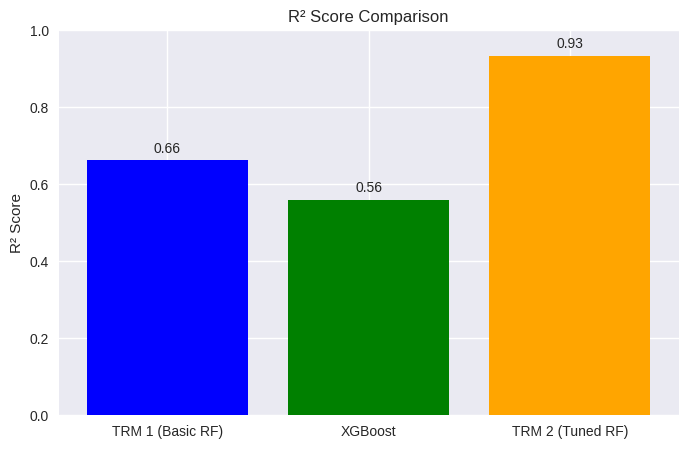

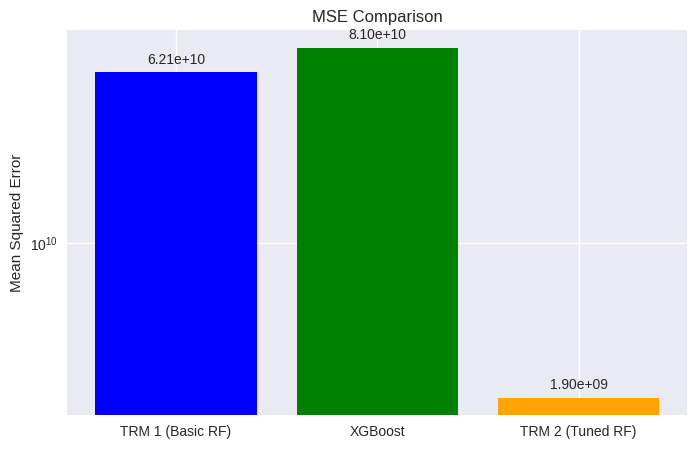

In [23]:
models = ['TRM 1 (Basic RF)', 'XGBoost', 'TRM 2 (Tuned RF)']
r2_scores = [0.6618, 0.5595, 0.9341]
mse_scores = [62146949120.52, 80956780001.97, 1903133027.35]

# Plot 1: R² Score Comparison
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Plot 2: MSE Comparison
plt.figure(figsize=(8,5))
plt.bar(models, mse_scores, color=['blue', 'green', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.yscale('log')  # Log scale because values are very large
for i, v in enumerate(mse_scores):
    plt.text(i, v*1.1, f"{v:.2e}", ha='center')
plt.show()



## **8.0 Deep Learning**

# **8.1 Pre-Processing**

# 8.1.1 encoding

In [72]:
label_encoders = {}
for col in ['status', 'city', 'state']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 8.1.2 Separate features and target

In [73]:
X = df.drop('price', axis=1)
y = df['price']

# 8.1.3 Split data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8.1.4 Feature Scaling

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**8.2 Build Deep Learning Model**
## Model Architecture:

1. input layer

2. hidden layers with ReLU activation

3. output layer for regression (no activation)

###8.2.1 build the model

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###8.2.2 Compile the Model


In [77]:
model.compile(optimizer='adam', loss='mse')

#**8.3 Train Model with Early Stopping**
##Why EarlyStopping?
### To avoid overfitting

**Stop training when validation loss doesn't improve**

##8.3.1 Define EarlyStopping

In [78]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

##8.3.2 Train the model

In [79]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 170204168192.0000 - val_loss: 68363762008064.0000
Epoch 2/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 136728846336.0000 - val_loss: 68362377887744.0000
Epoch 3/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 131526606848.0000 - val_loss: 68362012983296.0000
Epoch 4/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 131530448896.0000 - val_loss: 68361945874432.0000
Epoch 5/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 126567727104.0000 - val_loss: 68362784735232.0000
Epoch 6/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 129386979328.0000 - val_loss: 68361216065536.0000
Epoch 7/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 128425484288.0000 - val_loss: 68361425780736.0000
Epoch 8/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 131271704576.0000 - val_loss: 68360272347136.0000
Epoch 9/100
8447/8447 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 130985656320.0000 - val_


#**8.4 Evaluate the Model**

##8.4.1 Predict on Test Set

In [80]:
y_pred_dl = model.predict(X_test).flatten()

2640/2640 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step


##8.4.2 Calculate metrics

In [81]:
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)

print(f"Deep Learning Model MSE: {mse_dl}")
print(f"Deep Learning Model RMSE: {rmse_dl}")
print(f"Deep Learning Model R² Score: {r2_dl}")

Deep Learning Model MSE: 130315157223.92432
Deep Learning Model RMSE: 360991.90742165444
Deep Learning Model R² Score: 0.29087750814435154


#**8.5 Visualize Training History**

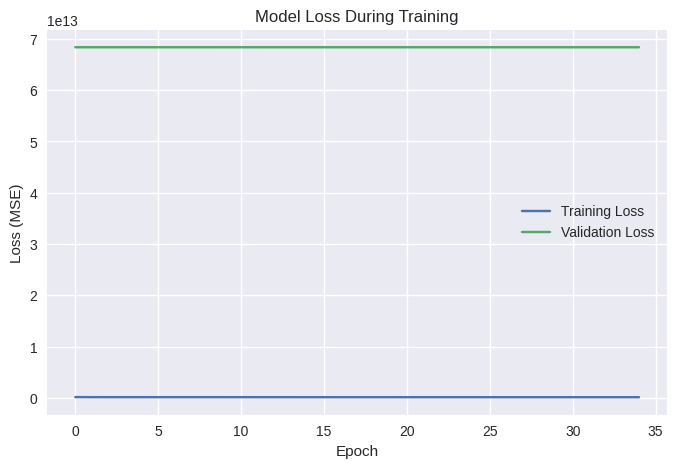

In [82]:
# Loss Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

##**8.6 Scatter Plot: Actual vs Predicted**

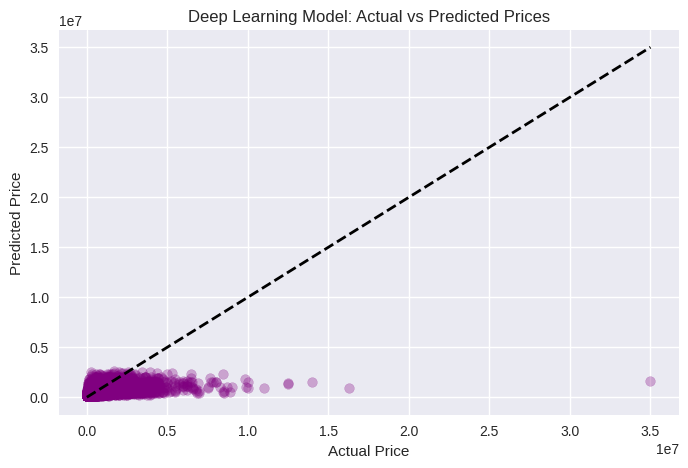

In [83]:
# Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_dl, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Deep Learning Model: Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


##**8.7 Save Model**

In [91]:
model.save('/content/drive/MyDrive/house_price_dl_model.h5')

#**9. Final Comparison of Models**

##9.1 Create the Results Table

In [85]:
# Define the metrics you already collected
model_names = ['Random Forest (TRM1)', 'XGBoost', 'Tuned RF (TRM2)', 'Deep Learning (DNN)']

r2_scores = [0.6618, 0.5595, 0.9341, r2_dl]  # Replace with your exact results
mse_scores = [62146949120.52, 80956780001.97, 1903133027.35, mse_dl]
rmse_scores = [np.sqrt(mse_scores[0]), np.sqrt(mse_scores[1]), np.sqrt(mse_scores[2]), rmse_dl]

# Create a DataFrame for easy visualization
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'R² Score': r2_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores
})

# Show Results
results_df


,Model,R² Score,MSE,RMSE
0,Random Forest (TRM1),0.661800,6.214695e+10,249292.898255
1,XGBoost,0.559500,8.095678e+10,284529.049487
2,Tuned RF (TRM2),0.934100,1.903133e+09,43624.912921
3,Deep Learning (DNN),0.290878,1.303152e+11,360991.907422


##9.2 Bar Plot for R² Score

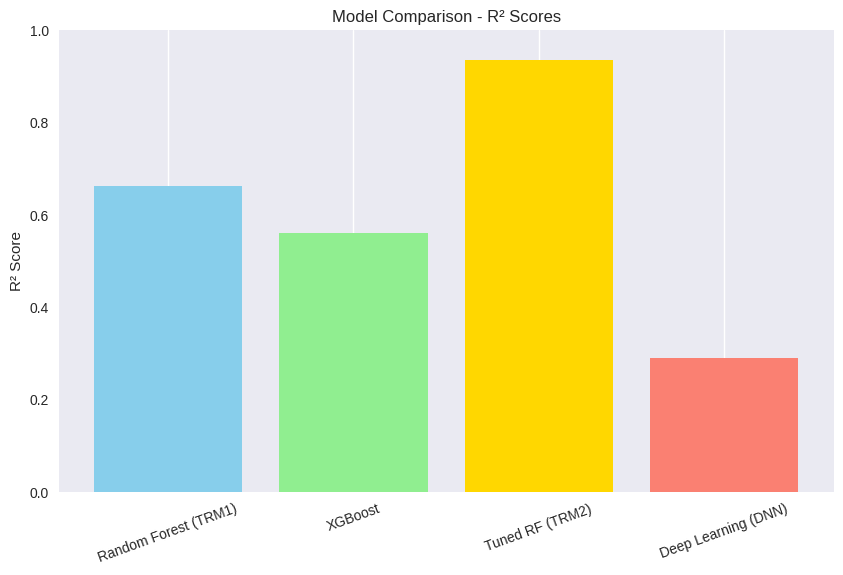

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['R² Score'], color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.title('Model Comparison - R² Scores')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


##9.3 Bar Plot for RMSE

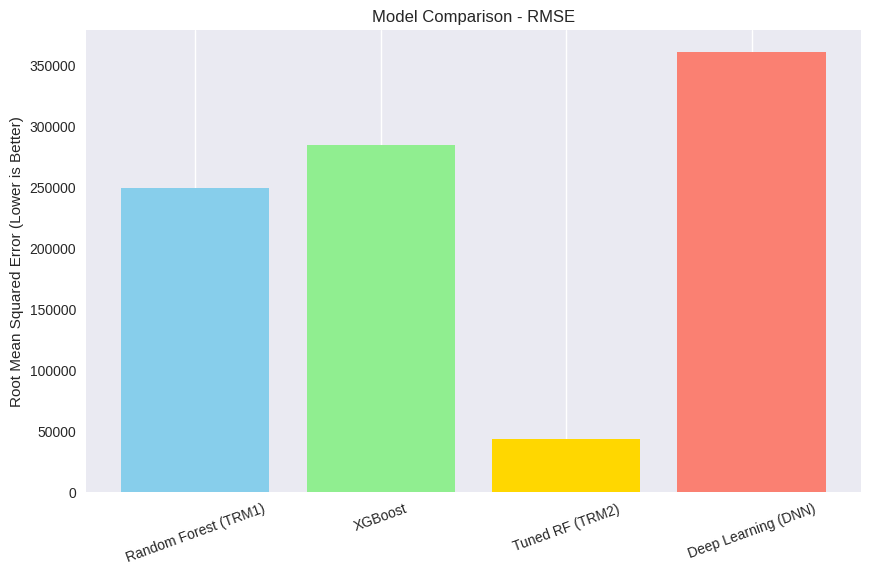

In [87]:
plt.figure(figsize=(10,6))
plt.bar(results_df['Model'], results_df['RMSE'], color=['skyblue', 'lightgreen', 'gold', 'salmon'])
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error (Lower is Better)')
plt.xticks(rotation=20)
plt.grid(axis='y')
plt.show()


#Conclusion

##*Random Forest performed better due to the dataset size or feature simplicity where deep learning's complexity wasn't fully utilized.*

In [93]:
import joblib
# After training TRM1 (Random Forest default)
joblib.dump(rf_trm1, '/content/drive/MyDrive/random_forest_trm1.pkl')

# After training XGBoost
joblib.dump(xgb, '/content/drive/MyDrive/xgboost_model.pkl')

# After training TRM2 (Tuned Random Forest after GridSearch)
joblib.dump(rf, '/content/drive/MyDrive/random_forest_trm2.pkl')

['/content/drive/MyDrive/random_forest_trm1.pkl']